In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
cancer = datasets.load_breast_cancer()

In [44]:
cancer.target.shape

(569,)

In [4]:
X,y = cancer.data, cancer.target

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [9]:
clf = svm.SVC(kernel="linear")

In [10]:
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [11]:
y_pred = clf.predict(X_test)

In [13]:
print("Accuray:", accuracy_score(y_test, y_pred))

Accuray: 0.9649122807017544


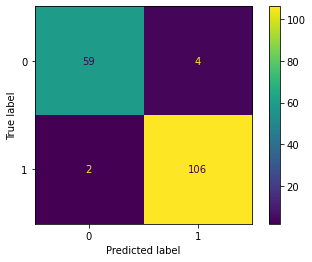

In [16]:
plot_confusion_matrix(clf, X_test,y_test)

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
model = svm.SVC()

In [21]:
model.fit(X_train_scaled, y_train)

SVC()

In [22]:
y_pred2 = model.predict(X_test_scaled)

In [24]:
print("Accuracy:",accuracy_score(y_test, y_pred2) )

Accuracy: 0.9766081871345029


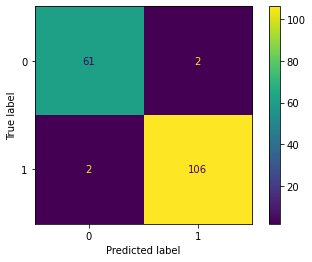

In [23]:
plot_confusion_matrix(model, X_test_scaled, y_test)

### using PCA to reduce the dimensionality

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2)

In [30]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [28]:
X_train_pca.shape

(398, 2)

In [31]:
model_pca = svm.SVC(kernel='linear')

In [32]:
model_pca.fit(X_train_pca, y_train)

SVC(kernel='linear')

In [33]:
y_pred_pca = model_pca.predict(X_test_pca) 

In [34]:
print("Accuracy:", accuracy_score(y_test,y_pred_pca))

Accuracy: 0.9707602339181286


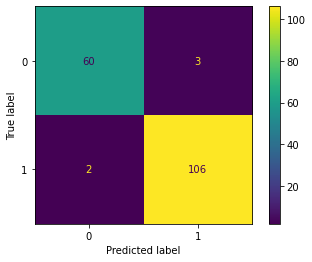

In [35]:
plot_confusion_matrix(model_pca, X_test_pca, y_test)

In [36]:
import matplotlib.pyplot as plt

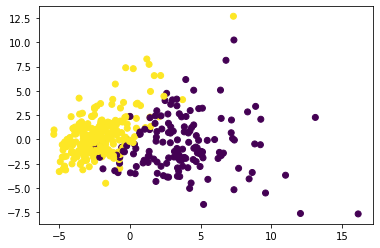

In [37]:
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train)